# Image Resizing method (Nearest, Bilinear, and Bicubic) Comparison

Image scaling or resizing is extreamly useful tool. A good resizing method allows the user to modify the size of the image while retain the detail the user desires. The more common methods are: nearest-neighbor, bilinear, and bicubic. They are different in computation complexity, timing, and final image quality. This notebook will put the three methods into study and compare each other to determine which method is better under certain circumstance. 

In [1]:
# Import python libraries
import cv2
import os
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import interp
import time

## Nearest-neighbor

The nearest-neighbor method is the most simple method of the three. It replaces every pixels with the nearest pixel in the output. It is the fastest method, so it is usually the go to method if timing is crucial. In some cases "nearest" does not have to be the mathematical nearest. In upsampling, OpenCV repeats the same pixel value up to the next sample pixel instead the true nearest pixel value.  

## Bilinear

The bilinear method takes the nearest 4 pixels, and replaces it with the weighted average of the 4 pixels. This method is great for continuous-tone images, but lose the contrast in the sharp edges. It is OpenCv use this method as default. 

## Bicubic
The bicubic method is the most complex of the three resizing methods. Simular to bilinear, it uses the weighted average to determine the pixel value, but unlike the bilinear method which uses the surounding 4 pixels, bicubic method uses 16 surrounding pixels (4 by 4) to determine the pixel value. The resized image using this methos usually are smoother and have fewer inerpolaiotn artifacts. 


## Comparison 

In [2]:
def resizePlot(img_input, scale, orginal = False):
    '''Plot the resized images sides by sides'''
    # Setup the methods and the titles
    title = ['Original', 'Nearest', 'Bilinear', 'Bicubic']
    method = [cv2.INTER_NEAREST, cv2.INTER_LINEAR, cv2.INTER_CUBIC]
    
    # Getting hight and width of the input image
    h, w = img_input.shape[:2]
    subp = 131
    plt.figure()
    for x in range(4):
        if x == 0 and orginal == True:
            fig = plt.gcf()
            DPI = fig.get_dpi()
            fig.set_size_inches(w/float(DPI),h/float(DPI))
            plt.imshow(img_input)
            plt.title(title[x])
            plt.axis('off')
            plt.show()
        elif x>0:
            plt.subplots_adjust(right = 2, bottom = 1, top = 2)
            image_out = cv2.resize(img_input, None, fx=scale, fy=scale, interpolation = method[x-1]) 
            plt.subplot(subp), plt.imshow(image_out),plt.title(title[x]), plt.axis('off')
            subp+=1


#### Small License Plate
The image up scaled by the nearest-neighbor method is too blocky to be identify what is written. The image up scaled by the bilinera method is more readable than the nearest-neighbor, but is still glossy. The image up scaled by the bicubic method is the most legible of the three methods.

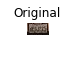

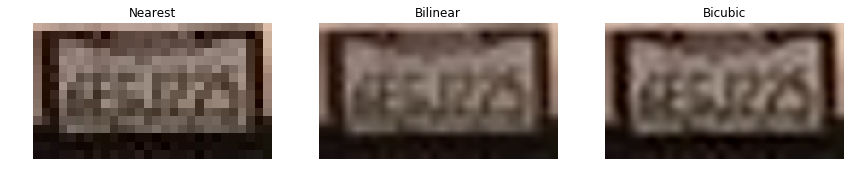

In [3]:
plate = cv2.imread('img/plate.png',cv2.IMREAD_COLOR) 
resizePlot(plate,10, True)

#### Shell

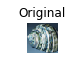

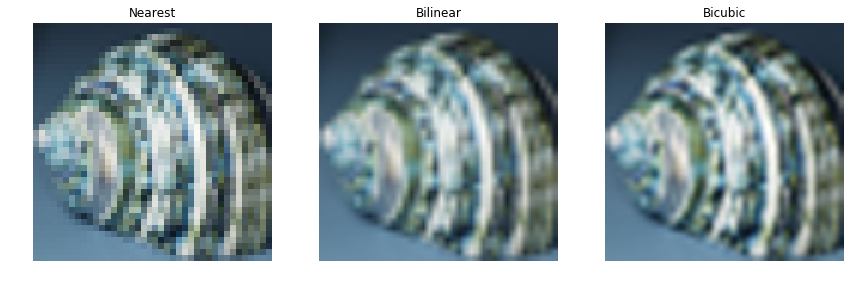

In [4]:
shell = cv2.imread('img/shell.png',cv2.IMREAD_COLOR)
resizePlot(shell,5, True)

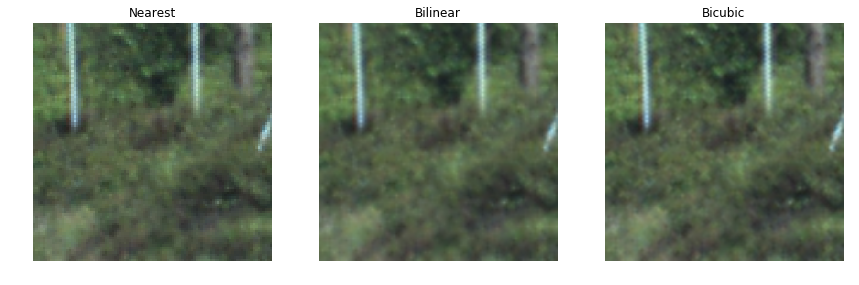

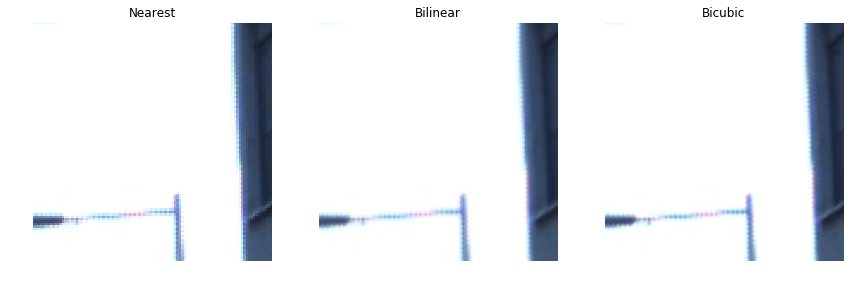

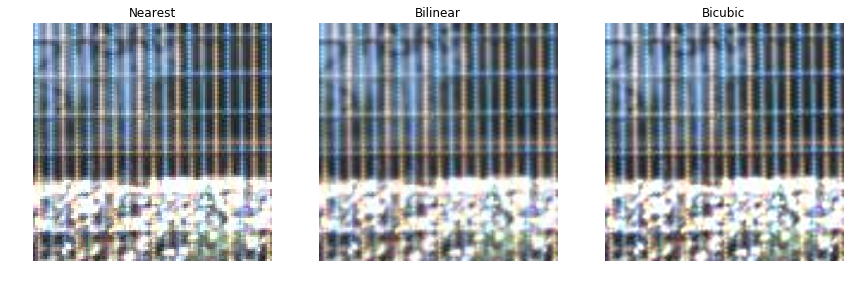

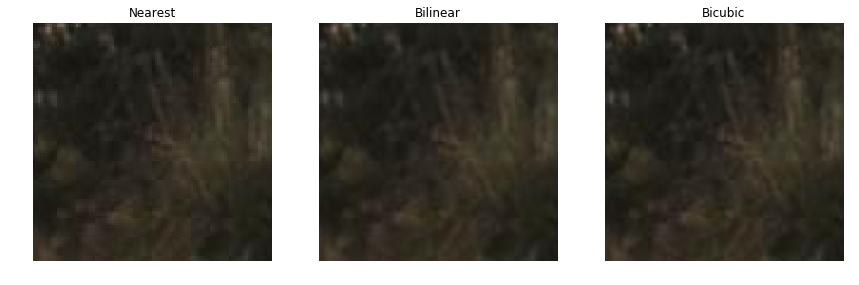

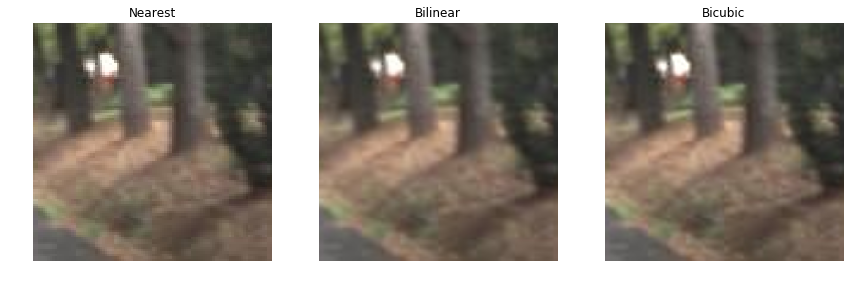

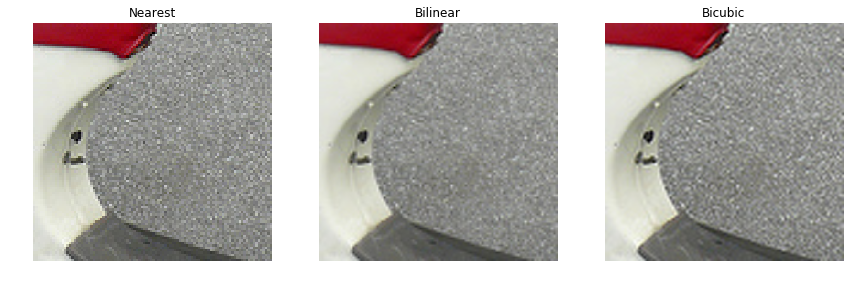

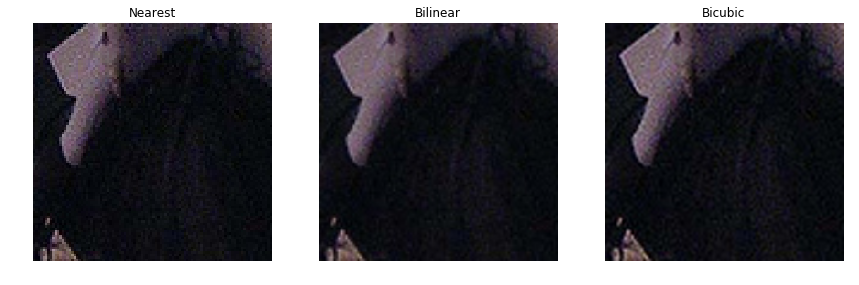

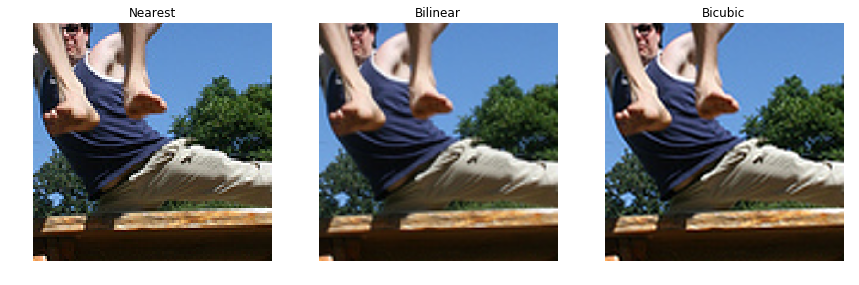

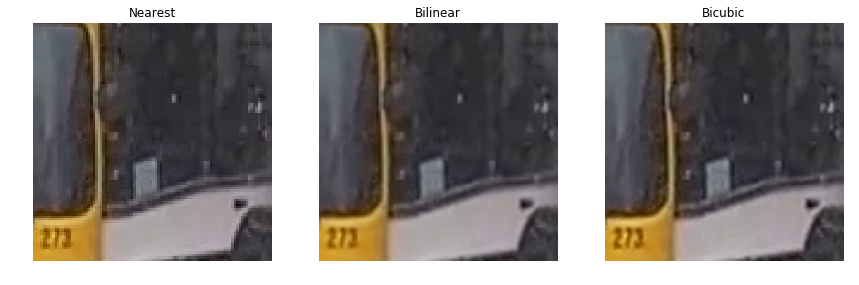

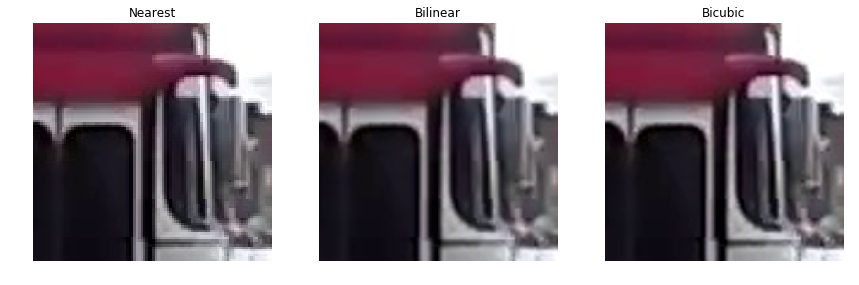

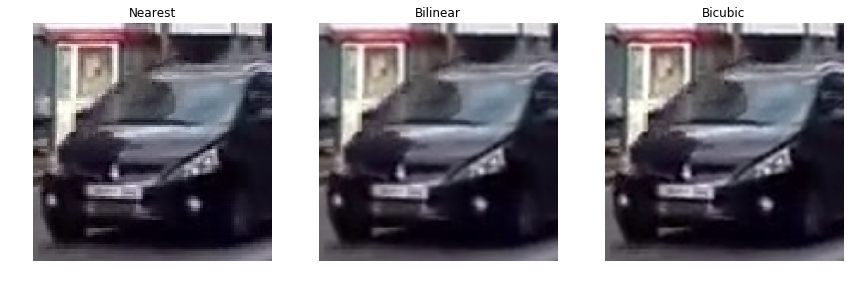

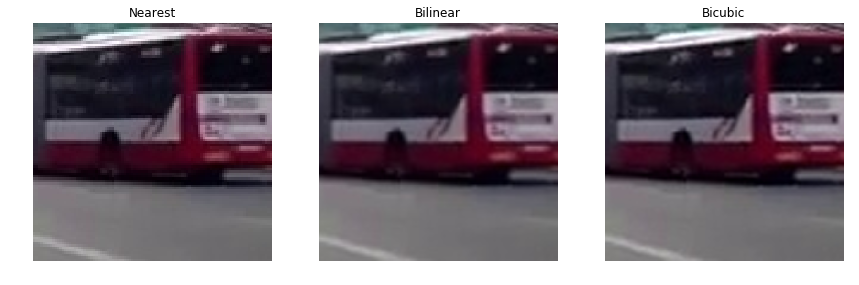

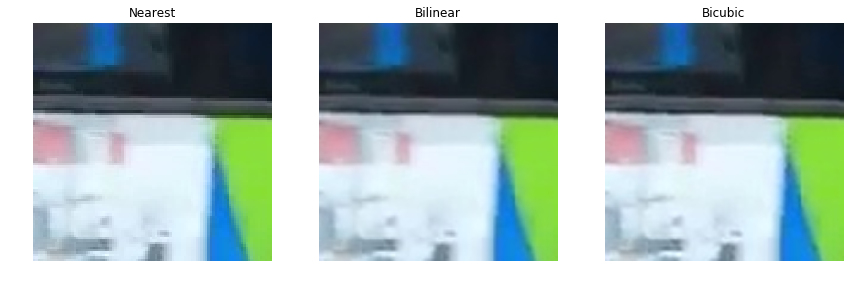

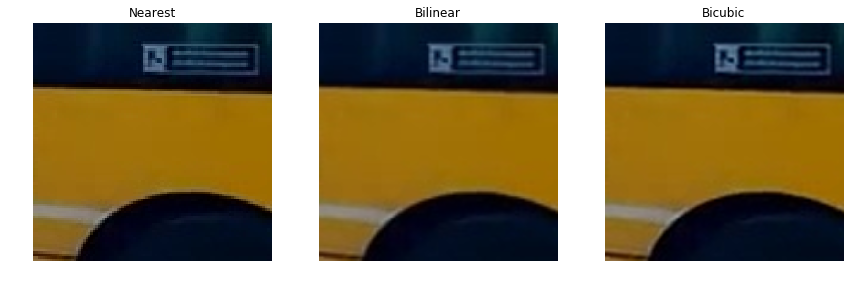

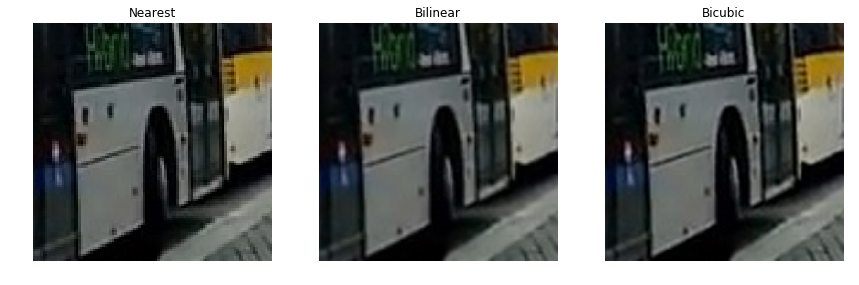

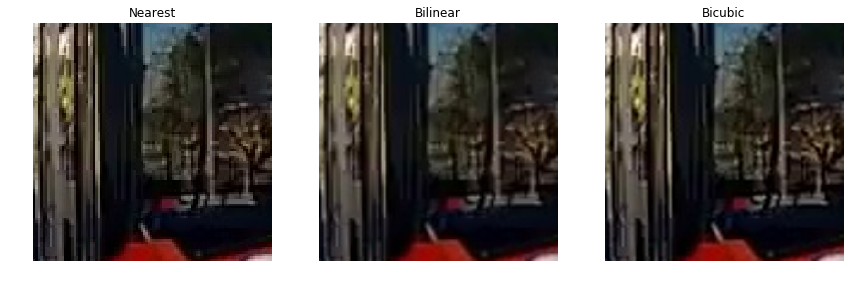

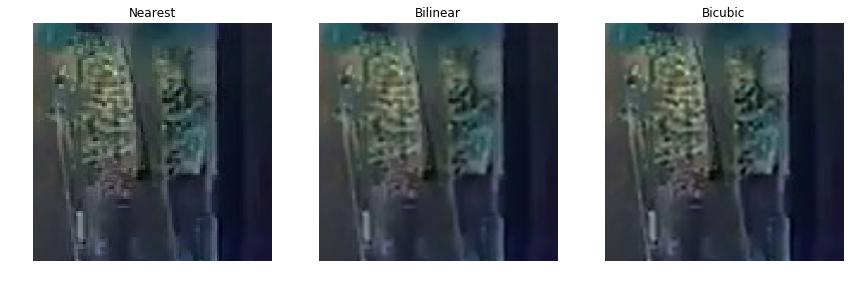

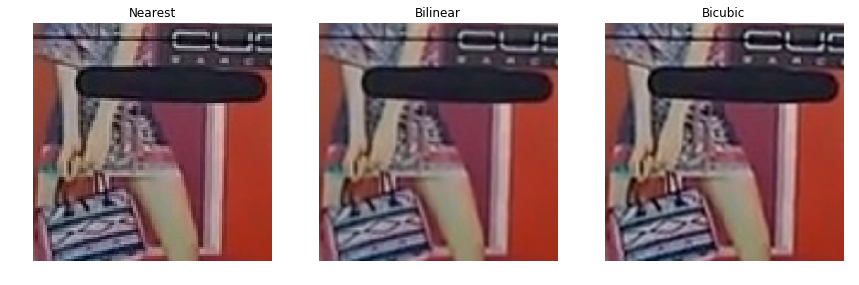

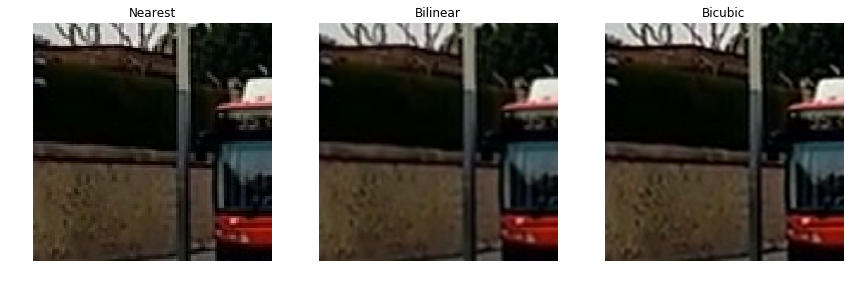

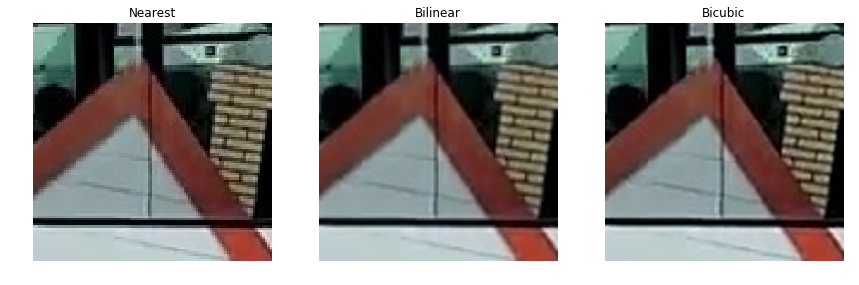

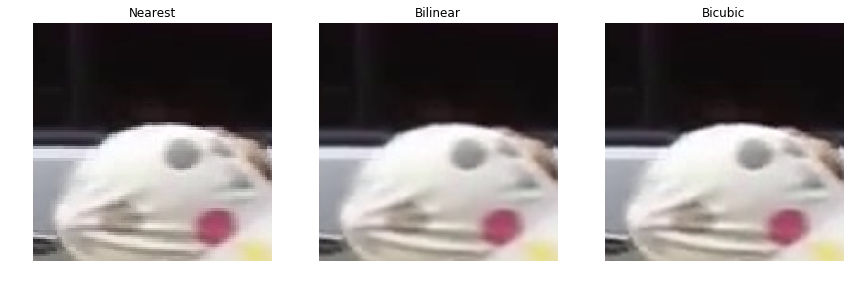

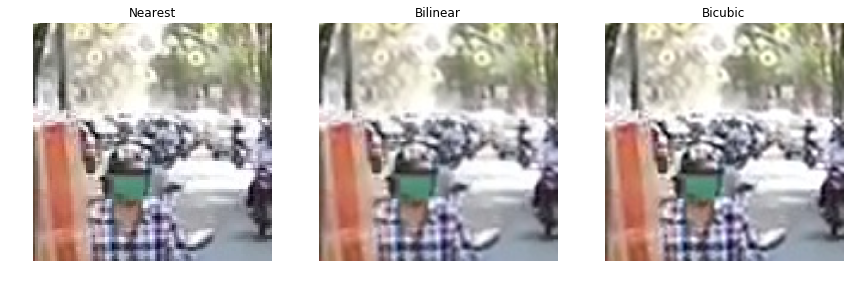

In [45]:
pathName = '/Volumes/Stuff/datasetTraffic/JPEGImages'
fileList = os.listdir(pathName)
method = [cv2.INTER_NEAREST, cv2.INTER_LINEAR, cv2.INTER_CUBIC]
title = ['Nearest', 'Bilinear', 'Bicubic']   

for x in range(len(fileList)): 
    if x % 5000 == 0:
        path = pathName + '/' + fileList[x]
        testImg = cv2.imread(path, cv2.IMREAD_COLOR)
        h, w = testImg.shape[:2]
        h_mid, w_mid = h//2, w//2
        imgCrop = testImg[h_mid-50:h_mid+50,w_mid-50:w_mid+50,:]
        imgCrop = cv2.cvtColor(imgCrop, cv2.COLOR_BGR2RGB)
        resizePlot(imgCrop,5)


### Shrinking Comparison

While making the image smaller, bilinear and bicubic method retained some detail from the orignal image, while nearest-neighbor method will lost some small detail. In this example, the image, lena has be resized to 1/10 of its original size. For better visualization, each image has resized back to its original size using nearest-neighbor method. The eyes of lena is no longer visible in nearest-neighbor method while bilinear and bicubic retain the detail of the eyes.

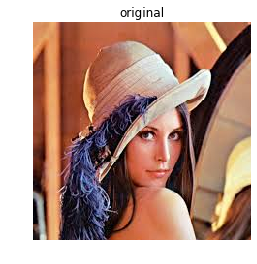

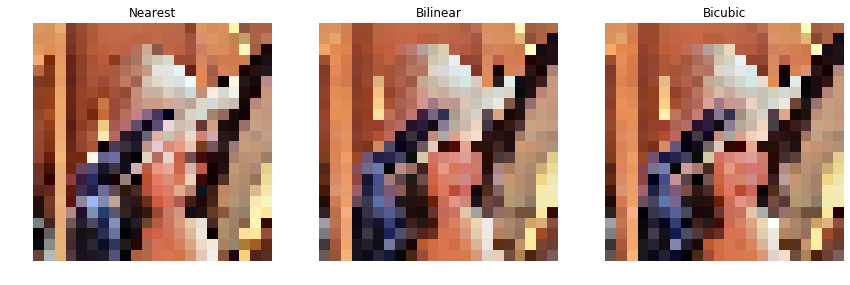

In [5]:
lena = cv2.imread('img/lena.jpeg',cv2.IMREAD_COLOR)
lena = cv2.cvtColor(lena, cv2.COLOR_BGR2RGB)
plt.imshow(lena)
plt.title('original')
plt.axis('off')
plt.show()

#[cv2.INTER_NEAREST, cv2.INTER_LINEAR, cv2.INTER_CUBIC]

im1 = cv2.resize(lena, None, fx=0.1, fy=0.1, interpolation = cv2.INTER_NEAREST)
im2 = cv2.resize(lena, None, fx=0.1, fy=0.1, interpolation = cv2.INTER_LINEAR)
im3 = cv2.resize(lena, None, fx=0.1, fy=0.1, interpolation = cv2.INTER_CUBIC)


im1R = cv2.resize(im1, None, fx=10, fy=10, interpolation = cv2.INTER_NEAREST)
im2R = cv2.resize(im2, None, fx=10, fy=10, interpolation = cv2.INTER_NEAREST)
im3R = cv2.resize(im3, None, fx=10, fy=10, interpolation = cv2.INTER_NEAREST)

plt.subplots_adjust(right = 2, bottom = 1, top = 2)
plt.subplot(131), plt.imshow(im1R), plt.title('Nearest'), plt.axis('off')
plt.subplot(132), plt.imshow(im2R), plt.title('Bilinear'), plt.axis('off')
plt.subplot(133), plt.imshow(im3R), plt.title('Bicubic'), plt.axis('off')
plt.show()


### Performance 

Each scaling methods is being applied to a image dataset form Urban Object Detection wihch contains 106920 jpeg images with mostly dimension of 1280 by 960. The magnitude of scaling is 10x both in height and width. The nearest-neighbor is expected to be the fastest. The bicubic method takes almost double the amount of time, and the bilinear method takes more than double of the time. A further experiment with less image imputs but with differentt magnitude of scaling (from 2x to 10x). The experiment shows that the bilinear method only out performs bicubic method when the magitude of scaling is below 4x. However, while down scaling the image, bilinear constantly out performs bicubic. 

In [6]:
pathName = '/Volumes/Stuff/datasetTraffic/JPEGImages'
pathOut = 'SavedImages/'
fileList = os.listdir(pathName)
method = [cv2.INTER_NEAREST, cv2.INTER_LINEAR, cv2.INTER_CUBIC]
title = ['Nearest', 'Bilinear', 'Bicubic']
scale = 10
time_record = [0, 0, 0]
for x in range(len(fileList)): 
    path = pathName + '/' + fileList[x]
    testImg = cv2.imread(path, cv2.IMREAD_COLOR)
    
    for m in range(len(method)):
        time_start = time.process_time()
        img_resized = cv2.resize(testImg, None, fx=scale, fy=scale, interpolation = method[m])
        time_elpsed = time.process_time()-time_start
        time_record[m] += time_elpsed
        
        if x%100 == 0:            
            fileName = fileList[x].split('.')
            pathSave = pathOut + fileName[0] + '_10x_' + title[m] + '.' +fileName[1] 
            cv2.imwrite(pathSave,img_resized)            
            if m == 0:
                path_o = pathOut + fileList[x]
                cv2.imwrite(path_o,testImg)  

In [9]:
time_ratio = [1, time_record[1]/time_record[0], time_record[2]/time_record[0]]
print("Time performance Ratio:")
print("[Nearest-neighbor : Bilinear : Bicubic] =", time_ratio)

Time performance Ratio:
[Nearest-neighbor : Bilinear : Bicubic] = [1, 2.3719897950593825, 1.966046236353604]


In [46]:
scale = [2,3,4,5,6,7,8,9,10]
templ = [[],[],[]]
for test in range(len(scale)):    
    time_record = [0, 0, 0]
    for x in range(len(fileList)): 
        if x % 10000 == 0:
            path = pathName + '/' + fileList[x]
            testImg = cv2.imread(path, cv2.IMREAD_COLOR)

            for m in range(len(method)):
                time_start = time.process_time()
                img_resized = cv2.resize(testImg, None, fx=scale[test], fy=scale[test], interpolation = method[m])
                time_elpsed = time.process_time()-time_start
                time_record[m] += time_elpsed
    templ[0].append(time_record[0])
    templ[1].append(time_record[1])
    templ[2].append(time_record[2])


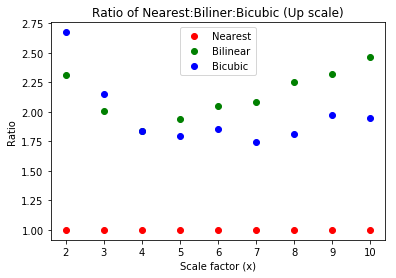

In [48]:
ne = []
bi = []
cu = []

for x in range(len(templ[0])):
    ne.append(1)
    bi.append(templ[1][x]/templ[0][x])
    cu.append(templ[2][x]/templ[0][x])
plt.plot(scale, ne, 'ro', label = 'Nearest')
plt.plot(scale, bi, 'go', label = 'Bilinear')
plt.plot(scale, cu, 'bo', label = 'Bicubic')
plt.legend()
plt.ylabel('Ratio'), plt.xlabel('Scale factor (x)')
plt.title('Ratio of Nearest:Biliner:Bicubic (Up scale)')
plt.show()

In [49]:
scale = [1/2,1/3,1/4,1/5,1/6,1/7,1/8,1/9,1/10]
templ = [[],[],[]]
for test in range(len(scale)):    
    time_record = [0, 0, 0]
    for x in range(len(fileList)): 
        if x % 10000 == 0:
            path = pathName + '/' + fileList[x]
            testImg = cv2.imread(path, cv2.IMREAD_COLOR)

            for m in range(len(method)):
                time_start = time.process_time()
                img_resized = cv2.resize(testImg, None, fx=scale[test], fy=scale[test], interpolation = method[m])
                time_elpsed = time.process_time()-time_start
                time_record[m] += time_elpsed
    templ[0].append(time_record[0])
    templ[1].append(time_record[1])
    templ[2].append(time_record[2])

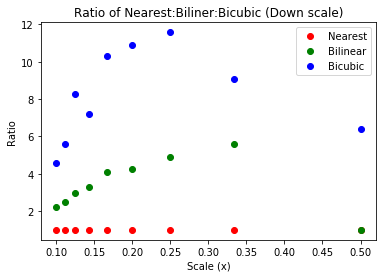

In [50]:
ne = []
bi = []
cu = []

for x in range(len(templ[0])):
    ne.append(1)
    bi.append(templ[1][x]/templ[0][x])
    cu.append(templ[2][x]/templ[0][x])
scale = [1/2,1/3,1/4,1/5,1/6,1/7,1/8,1/9,1/10]

plt.plot(scale, ne, 'ro', label = 'Nearest')
plt.plot(scale, bi, 'go', label = 'Bilinear')
plt.plot(scale, cu, 'bo', label = 'Bicubic')
plt.legend()
plt.ylabel('Ratio'), plt.xlabel('Scale (x)')
plt.title('Ratio of Nearest:Biliner:Bicubic (Down scale)')
plt.show()

## Conclusion

For up scaling an image, bicubic will always produce the best images. For down scaling an image, bilinear is a more effective method.

#### Reference:

Wikipedia. Image scaling. Retrieved on Augest 1, 2019, from https://en.wikipedia.org/wiki/Image_scaling

OpenCV. Geometric Image Transformations. Retrieved on Augest 1, 2019, from https://docs.opencv.org/2.4/modules/imgproc/doc/geometric_transformations.html


Images:
License Plate: Cropped and retrieved on Augest 1, 2019, from https://miro.medium.com/max/700/1*EYFejGUjvjPcc4PZTwoufw.jpeg

Shell: Wikipedia. Comparison gallery of image scaling algorithms. Retrieved Augest 1, 2019, from: https://en.wikipedia.org/wiki/Comparison_gallery_of_imahe_scaling_algorithms

Lenna: Wikipedia. Lenna. Retrieved Augest 2, 2019, from: https://en.wikipedia.org/wiki/Lenna


Datasset:
A. Dominguez-Sanchez, M. Cazorla, and S. Orts-Escolano. (2018). Urban Object Detection dataset. Retrieved Augest 2, 2019, from: http://www.rovit.ua.es/dataset/traffic